#kaggle 참조

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
import pandas_profiling as pp

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("/Users/kimdongkyu/Desktop/python/200204 KNN 발표/heart.csv")

In [3]:
data.head(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
target_name = 'target'
data_target = data[target_name]
data = data.drop([target_name], axis=1)

In [6]:
train, test, target, target_test = train_test_split(data, data_target, test_size=0.2, random_state=0)

In [7]:
train.head(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
74,43,0,2,122,213,0,1,165,0,0.2,1,0,2
153,66,0,2,146,278,0,0,152,0,0.0,1,1,2
64,58,1,2,140,211,1,0,165,0,0.0,2,0,2


In [8]:
test.head(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
225,70,1,0,145,174,0,1,125,1,2.6,0,0,3
152,64,1,3,170,227,0,0,155,0,0.6,1,0,3
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3


In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 242 entries, 74 to 172
Data columns (total 13 columns):
age         242 non-null int64
sex         242 non-null int64
cp          242 non-null int64
trestbps    242 non-null int64
chol        242 non-null int64
fbs         242 non-null int64
restecg     242 non-null int64
thalach     242 non-null int64
exang       242 non-null int64
oldpeak     242 non-null float64
slope       242 non-null int64
ca          242 non-null int64
thal        242 non-null int64
dtypes: float64(1), int64(12)
memory usage: 26.5 KB


In [10]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61 entries, 225 to 89
Data columns (total 13 columns):
age         61 non-null int64
sex         61 non-null int64
cp          61 non-null int64
trestbps    61 non-null int64
chol        61 non-null int64
fbs         61 non-null int64
restecg     61 non-null int64
thalach     61 non-null int64
exang       61 non-null int64
oldpeak     61 non-null float64
slope       61 non-null int64
ca          61 non-null int64
thal        61 non-null int64
dtypes: float64(1), int64(12)
memory usage: 6.7 KB


In [36]:
# Random Forest

random_forest = GridSearchCV(estimator=RandomForestClassifier(), param_grid={'n_estimators': [100, 300]}, cv=5).fit(train, target)
random_forest.fit(train, target)
acc_random_forest = round(random_forest.score(train, target) * 100, 2)
print(acc_random_forest,random_forest.best_params_)

100.0 {'n_estimators': 300}


In [13]:
acc_test_random_forest = round(random_forest.score(test, target_test) * 100, 2)
acc_test_random_forest

85.25

#내코드 random forest 참고

In [32]:
data = pd.read_csv("/Users/kimdongkyu/Desktop/python/200204 KNN 발표/heart.csv")

In [33]:
target_name = 'target'
data_target = data[target_name]
data = data.drop([target_name], axis=1)

In [34]:
x_train, x_test, y_train, y_test = train_test_split(data, data_target, test_size=0.2, random_state=0)

In [35]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators':[100],
    'max_depth' : [6, 8, 10, 12], 
    'min_samples_leaf' : [8, 12, 18 ],
    'min_samples_split' : [8, 16, 20]
}
# RandomForestClassifier 객체 생성 후 GridSearchCV 수행
rf_clf = RandomForestClassifier(random_state=0, n_jobs=-1)
grid_cv = GridSearchCV(rf_clf , param_grid=params , cv=5, n_jobs=-1 )
grid_cv.fit(x_train , y_train)

print('최적 하이퍼 파라미터:\n', grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터:
 {'max_depth': 6, 'min_samples_leaf': 8, 'min_samples_split': 20, 'n_estimators': 100}
최고 예측 정확도: 0.8306


In [23]:
rf_clf1 = RandomForestClassifier(n_estimators=300, max_depth=6, min_samples_leaf=8, \
                                 min_samples_split=20, random_state=0)
rf_clf1.fit(train , target)
pred = rf_clf1.predict(test)
print('예측 정확도: {0:.4f}'.format(accuracy_score(target_test , pred)))

예측 정확도: 0.8525


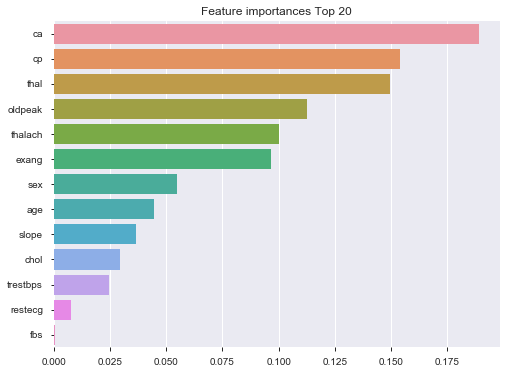

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

ftr_importances_values = rf_clf1.feature_importances_
ftr_importances = pd.Series(ftr_importances_values,index=train.columns  )
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top20 , y = ftr_top20.index)
plt.show()